In [1]:
from CaAttributes import CaNeighbourhoods, MemoryTypes, RuleTypes
import itertools
%load_ext autoreload
%autoreload 2
from CaMemory1D import CaMemory1D
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.decomposition import PCA
     
    
    
    

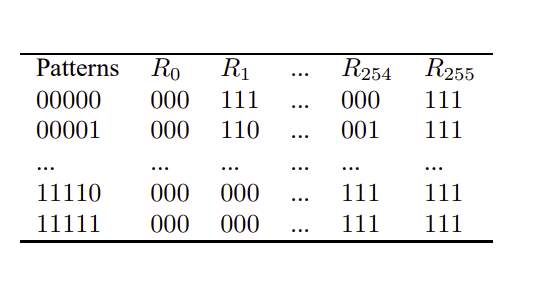

# Regular 

In [75]:
def step_all_rules(input_state, gridsize):
    n = len(input_state)
    results=[]
    for rule_num in range(256):
        new_state = [0] * n
        ca = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Default )    
        ca.set_state_reset(input_state)
        ca.set_rule_number(rule_num)
        result=ca.step()    
        result=ca.step() 
        result=ca.step() 
        results.append(int(''.join(map(str, result)), 2))    
    return results
def step_all_rules_mem(input_state, gridsize):
    n = len(input_state)
    results=[]
    for rule_num in range(256):
        new_state = [0] * n
        ca = CaMemory1D(grid_size=gridsize , rule_type=RuleTypes.Default,
                memory_type=MemoryTypes.Most_Frequent )    
        ca.set_state_reset(input_state)
        ca.set_rule_number(rule_num)
        result=ca.step( )
        result=ca.step( )
        result=ca.step( )
        results.append(int(''.join(map(str, result)), 2))    
    return results
gridsize=5
x_values = [seq for seq in itertools.product("01", repeat=gridsize)]
x_values = [[int(bit) for bit in seq] for seq in x_values]
data_set=[]
for x_value in x_values:
    data_point=step_all_rules(x_value,gridsize)
     
    data_set.append(data_point)

df = pd.DataFrame(data_set ) 
matrix=np.array(df)
E = np.mean(matrix, axis=0)  
matrix.shape
F=matrix.T-E[:, np.newaxis]
X=F.T

pca=PCA(n_components=12)
p_comp_=pca.fit_transform(df)
np.set_printoptions(threshold=np.inf)

np.set_printoptions(suppress=True)

print(p_comp)


[[ 151.65  124.    124.     -0.      0.      0.      8.22    0.  ]
 [  91.68   44.    -24.      4.    -56.    -56.    -32.03   -0.  ]
 [ 128.94   88.     76.      8.     12.     12.      4.68   -0.  ]
 [  68.98   32.    -48.    -12.    -44.    -52.    -35.58    0.  ]
 [ 106.24   52.     28.     16.     24.     24.      1.14   -0.  ]
 [  46.28  -28.    -88.     20.    -32.    -32.    -39.12    0.  ]
 [  83.54   64.     28.    -24.     36.     20.     -2.41    0.  ]
 [  23.57    8.    -96.    -12.    -20.    -44.    -42.66   -0.  ]
 [  60.83  -20.    -68.     32.     48.     48.     -5.95   -0.  ]
 [   0.87 -100.     40.     36.     -8.     -8.    -46.21    0.  ]
 [  38.13  -56.    -52.     40.     60.     60.     -9.5     0.  ]
 [ -21.83 -112.     80.     20.      4.     -4.    -49.75    0.  ]
 [  15.43    4.    -68.    -48.     72.     40.    -13.04   -0.  ]
 [ -44.54  -76.     72.    -44.     16.    -16.    -53.3     0.  ]
 [  -7.28   16.    -68.    -24.     84.     36.    -16.58    0

# Memory

In [81]:
for x_value in x_values:
    data_point=step_all_rules_mem(x_value,gridsize)
     
    data_set.append(data_point)

df = pd.DataFrame(data_set ) 
matrix=np.array(df)
E = np.mean(matrix, axis=0)  
matrix.shape
F=matrix.T-E[:, np.newaxis]
X=F.T

pca=PCA(n_components=40)
p_comp_mem=pca.fit_transform(df)
np.set_printoptions(suppress=True)

print(p_comp_mem)


[[ 125.6    89.55  106.86  109.34   10.2   -34.94   -0.     49.71   -0.32
    14.45   30.36    0.      1.51    0.      0.      5.07   -0.     -0.
    -2.27    0.     -4.17   -4.51    4.34    0.      3.22    0.     -6.33
     0.     -0.      0.65    0.      0.      0.     -0.      0.      0.
     0.      0.      0.      0.  ]
 [  78.53  -26.45  -25.19   11.31   35.51   35.27   28.85    1.85   16.96
     2.69  -16.79    4.71  -21.28   -9.69    8.45   -3.98   35.04  -30.55
   -25.76    7.52    1.44  -17.12    0.73  -11.51   -8.69   -9.59    5.99
    -5.52    6.46   13.36    3.43    0.      0.     -0.      0.     -0.
    -0.     -0.     -0.      0.  ]
 [  67.47  -29.3   -41.3     0.9    11.77   45.57   14.56   18.03  -53.9
    56.54  -21.3    12.98  -19.19  -16.93   15.57   -3.35   -2.17    1.1
     4.38    9.09  -10.32    2.71   15.73    4.39   10.1     8.65   -1.66
    12.35  -13.19   -4.89   -6.34   -0.      0.     -0.     -0.     -0.
     0.     -0.      0.      0.  ]
 [  32.24  -33.25

In [73]:
print(p_comp_mem[0])

[ 125.6    89.55 -106.86  109.34  -10.2   -34.94    0.    -49.71    0.32
   14.45   30.36   -0.  ]
